In [2]:
%load_ext wurlitzer


# 1- PS2

preparing the data

```shell
mkdir ~/ps2 # Make a home directory for yourself
bcftools query -e'AF<0.01' -e'AF>0.99' -f "[%GT\t]\n" ps2_pca.genotypes.vcf.gz | \
  sed 's/0|0/0/g' | sed 's/0|1/1/g' | sed 's/1|0/1/g' | sed 's/1|1/2/g' | \
  grep -v "|" \
  > ~/ps2/ps2_pca.genotypes.tab
```

The sample labels for each column can also be obtained using bcftools:
```shell
bcftools query -l ps2_pca.genotypes.vcf.gz > ~/ps2/ps2_pca.samples.txt
```

In [ ]:
import numpy as np

data = np.loadtxt('./ps2_pca.genotypes.tab') #snps*samples
data_transpose = data.transpose()

## 1-1 PCA

In [35]:
import numpy as np
import os
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca.fit(data_transpose)

# transform data
d_pca = pca.transform(data_transpose)
# save the projected data
np.savetxt('./ps2_pca.projection-tab.txt', d_pca,delimiter='\t')
np.savetxt('./ps2_pca.projection.txt', d_pca)


Populating the interactive namespace from numpy and matplotlib
PC values for NA10847 = [-13.95690708 -28.82108887   6.61455169]
PC values for NA18923 = [52.25820174  4.05413067  1.97296102]
PC values for NA19700 = [25.74384248 -6.66363662  2.22258301]


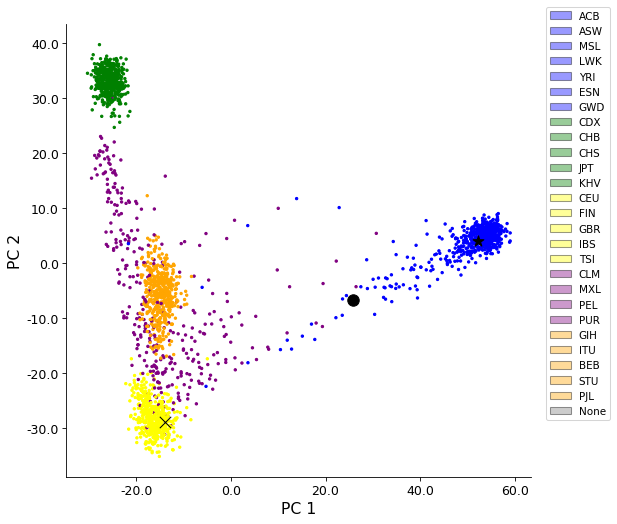

In [34]:
%pylab inline
import numpy as np
import os
import matplotlib.patches as mpatches
    
####### Set up sample lists and color information #####
# Load population labels
sample_to_pop = {}
with open("/datasets/cs284s-sp20-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

#Recommended colors for each population group


pop_to_color = {"ACB": "blue","ASW": "blue", "MSL":"blue","LWK": "blue", "YRI": "blue", "ESN": "blue", "GWD": "blue",
"CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green","KHV": "green",
"CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
"CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
"GIH": "orange","ITU": "orange", "BEB": "orange", "STU": "orange", "PJL": "orange",
"None": "gray"
}  #
# Load samples list and get colors
if not os.path.exists(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt")):
    samples = []
else: samples = [item.strip() for item in open(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
####### Load data #####
pc1 = [0]*len(samples)
pc2 = [0]*len(samples)

pc1=d_pca[:,0]
pc2 = d_pca[:,1]

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('PC values for %s = %s'%(x,d_pca[samples.index(x)]))
    
ax.scatter(d_pca[samples.index('NA10847'),0], d_pca[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA18923'),0], d_pca[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA19700'),0], d_pca[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)
fig.savefig("pca.pdf",bbox_inches='tight')


## 1-2 T-sne

In [28]:
from sklearn.manifold import MDS, TSNE
import numpy as np
import os
import pickle

#try different hyperparameters
#-------------------------
tsne_40 = TSNE(n_components=2,perplexity = 40,random_state=0)
tsne_50 = TSNE(n_components=2,perplexity = 50,random_state=0)  #equals to n^1/2
tsne_50_iter5000 = TSNE(n_components=2,perplexity = 50,random_state=0,n_iter=5000)  #equals to n^1/2
tsne_10 = TSNE(n_components=2,perplexity = 10,random_state=0)
tsne_30 = TSNE(n_components=2,perplexity = 30,random_state=0)
tsne_60 = TSNE(n_components=2,perplexity = 60,random_state=0,n_iter=5000)
tsne_60_iter5000 = TSNE(n_components=2,perplexity = 60,random_state=0)
tsne_100 = TSNE(n_components=2,perplexity = 100,random_state=0)
tsne_100_1000 = TSNE(n_components=2,perplexity = 100,random_state=0,n_iter=1000)

# fit and save  -------------------------------------------
data_tsne_40 = tsne_40.fit(data_transpose)
np.save('data_tsne_40.npy', data_tsne_40)

data_tsne_50 = tsne_50.fit(data_transpose)
np.save('data_tsne_50.npy', data_tsne_50)

data_tsne_50_iter5000 = tsne_50_iter5000.fit(data_transpose)
np.save('data_tsne_50_iter5000.npy', data_tsne_50_iter5000)

data_tsne_10 = tsne_10.fit(data_transpose)
np.save('data_tsne_10.npy', data_tsne_10)

data_tsne_30 = tsne_30.fit(data_transpose)
np.save('data_tsne_30.npy', data_tsne_30)

data_tsne_60 = tsne_60.fit(data_transpose)
np.save('data_tsne_60.npy', data_tsne_60)

data_tsne_60_iter5000 = tsne_60.fit(data_transpose)
np.save('data_tsne_60_iter5000.npy', data_tsne_60_iter5000)

data_tsne_100 = tsne_100.fit(data_transpose)
np.save('data_tsne_100.npy', data_tsne_100)

data_tsne_100_1000 = tsne_100_1000.fit(data_transpose)
np.save('data_tsne_100_1000.npy', data_tsne_100_1000)


In [2]:

data_tsne_40 = np.load('data_tsne_40.npy' ,allow_pickle=True)
data_tsne_50 = np.load('data_tsne_50.npy',allow_pickle=True)
data_tsne_50_iter5000 = np.load('data_tsne_50_iter5000.npy',allow_pickle=True)
data_tsne_10 = np.load('data_tsne_10.npy',allow_pickle=True)
data_tsne_30 = np.load('data_tsne_30.npy',allow_pickle=True)
data_tsne_60 = np.load('data_tsne_60.npy',allow_pickle=True)
data_tsne_60_iter5000 = np.load('data_tsne_60_iter5000.npy',allow_pickle=True)
data_tsne_100 = np.load('data_tsne_100.npy',allow_pickle=True)
data_tsne_100_1000 = np.load('data_tsne_100_1000.npy',allow_pickle=True)

In [11]:
####### Load data 
t1_50 = [0]*len(samples)
t1_50 = [0]*len(samples)
d_tsne_50=data_tsne_50.item().embedding_#.embedding_
t1_50=d_tsne_50[:,0]
t2_50 = d_tsne_50[:,1]
#---------
t1_50_iters = [0]*len(samples)
t2_50_iters = [0]*len(samples)
d_tsne_50_iters=data_tsne_50_iter5000.item().embedding_
t1_50_iters=d_tsne_50_iters[:,0]
t2_50_iters = d_tsne_50_iters[:,1]
#--------
t1_60 = [0]*len(samples)
t1_60 = [0]*len(samples)
d_tsne_60=data_tsne_60.item().embedding_

t1_60=d_tsne_60[:,0]
t2_60 = d_tsne_60[:,1]
#---------
t1_60_iters = [0]*len(samples)
t2_60_iters = [0]*len(samples)
d_tsne_60_iters=data_tsne_60_iter5000.item().embedding_

t1_60_iters=d_tsne_60_iters[:,0]
t2_60_iters = d_tsne_60_iters[:,1]

#--------
t1_100 = [0]*len(samples)
t1_100 = [0]*len(samples)
d_tsne_100=data_tsne_100.item().embedding_

t1_100=d_tsne_100[:,0]
t2_100 = d_tsne_100[:,1]
#---------
t1_100_iters = [0]*len(samples)
t2_100_iters = [0]*len(samples)
d_tsne_100_iters=data_tsne_100_1000.item().embedding_

t1_100_iters=d_tsne_100_iters[:,0]
t2_100_iters = d_tsne_100_iters[:,1]
#--------
t1_10 = [0]*len(samples)
t1_10 = [0]*len(samples)
d_tsne_10=data_tsne_10.item().embedding_

t1_10=d_tsne_10[:,0]
t2_10 = d_tsne_10[:,1]

#--------
t1_30 = [0]*len(samples)
t1_30 = [0]*len(samples)
d_tsne_30=data_tsne_30.item().embedding_

t1_30=d_tsne_30[:,0]
t2_30 = d_tsne_30[:,1]

#--------

t1_40 = [0]*len(samples)
t1_40 = [0]*len(samples)
d_tsne_40=data_tsne_40.item().embedding_

t1_40=d_tsne_40[:,0]
t2_40 = d_tsne_40[:,1]



In [30]:
def plot_maker(ax,t1,t2,d_tsne,title,fig,samples,pop_to_color,colors):
    ax.scatter(t1, t2, color=colors, s=5)
    # Now make it look a little prettier since I can't stand matplotlib defaults...
    ax.set_xlabel("tsne 1", size=15)
    ax.set_ylabel("tsne 2", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    ax.spines["top"].set_visible(False);
    ax.spines["right"].set_visible(False);
    leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

    ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
    ax.get_xaxis().tick_bottom();
    ax.get_yaxis().tick_left();

    interesting_s = ['NA10847','NA18923','NA19700']
    indices=[samples.index(x) for x in interesting_s]
    for x in interesting_s: print('tsne values for %s = %s'%(x,d_tsne[samples.index(x)]))

    ax.scatter(d_tsne[samples.index('NA10847'),0], d_tsne[samples.index('NA10847'),1],s=20,marker="x",c="black",linewidth=1)
    ax.scatter(d_tsne[samples.index('NA18923'),0], d_tsne[samples.index('NA18923'),1],s=20,marker="*",c="black",linewidth=1)
    ax.scatter(d_tsne[samples.index('NA19700'),0], d_tsne[samples.index('NA19700'),1],s=20,marker="o",c="black",linewidth=1)
    fig.savefig('PS2_T-SNE_'+title+'.pdf',bbox_inches='tight')
#     plt.close(fig) 



tsne values for NA10847 = [-16.572771  -5.685994]
tsne values for NA18923 = [-7.829069 17.471241]
tsne values for NA19700 = [-5.8807783 13.05168  ]


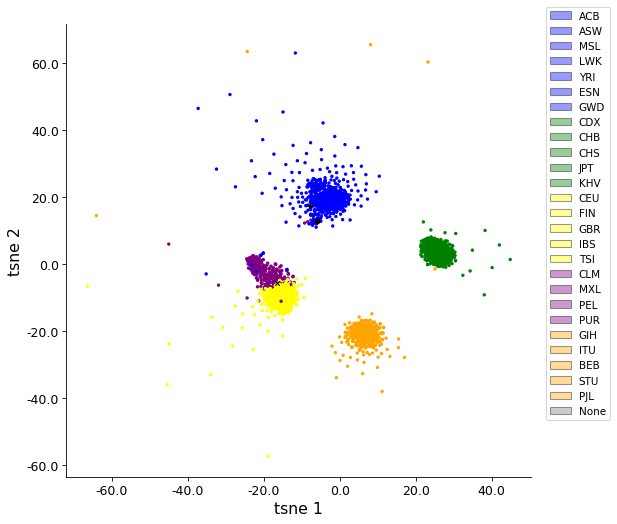

In [32]:

fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_50,t2_50,d_tsne_50,'perplexity=50',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [-21.779644   -6.9043303]
tsne values for NA18923 = [-9.693777 25.157799]
tsne values for NA19700 = [-7.9272337 20.453266 ]


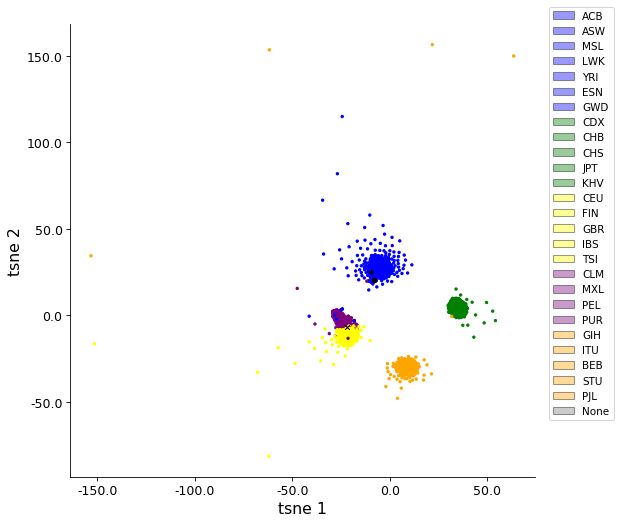

In [33]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_50_iters,t2_50_iters,d_tsne_50_iters,'perplexity=50, n_iter=5000',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [-11.920113 -18.697317]
tsne values for NA18923 = [-25.826946  15.352909]
tsne values for NA19700 = [-22.200489  13.98224 ]


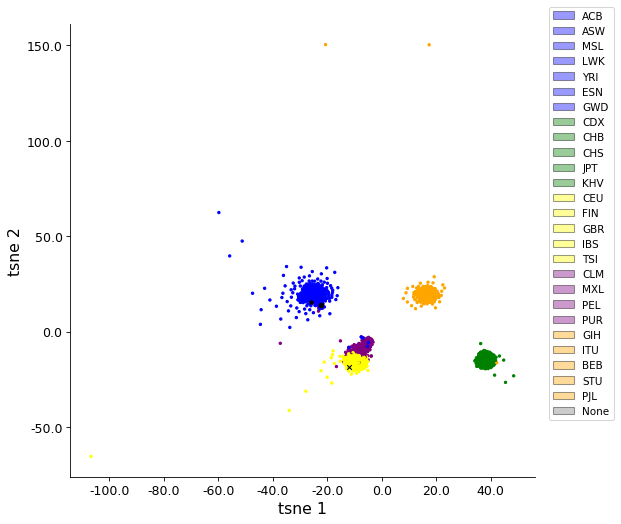

In [34]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_60,t2_60,d_tsne_60,'perplexity=60',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [-11.920113 -18.697317]
tsne values for NA18923 = [-25.826946  15.352909]
tsne values for NA19700 = [-22.200489  13.98224 ]


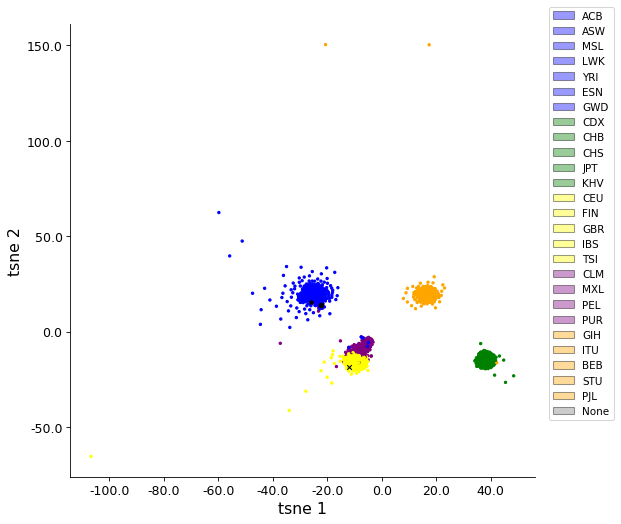

In [35]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_60_iters,t2_60_iters,d_tsne_60_iters,'perplexity=60, n_iter=5000',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [12.930222 35.926025]
tsne values for NA18923 = [ -0.09013256 -18.674648  ]
tsne values for NA19700 = [-9.834651  3.29217 ]
tsne values for NA10847 = [ 1.9924742e+01 -1.3919226e-02]
tsne values for NA18923 = [-23.59671    -1.7814549]
tsne values for NA19700 = [-19.49574    8.098425]
tsne values for NA10847 = [10.179919 -3.191583]
tsne values for NA18923 = [-23.83293     -0.27079168]
tsne values for NA19700 = [-20.196377   2.839531]
tsne values for NA10847 = [-11.357382   -3.1648574]
tsne values for NA18923 = [  3.9720109 -19.849438 ]
tsne values for NA19700 = [  2.0965142 -16.75324  ]
tsne values for NA10847 = [-11.357382   -3.1648574]
tsne values for NA18923 = [  3.9720109 -19.849438 ]
tsne values for NA19700 = [  2.0965142 -16.75324  ]


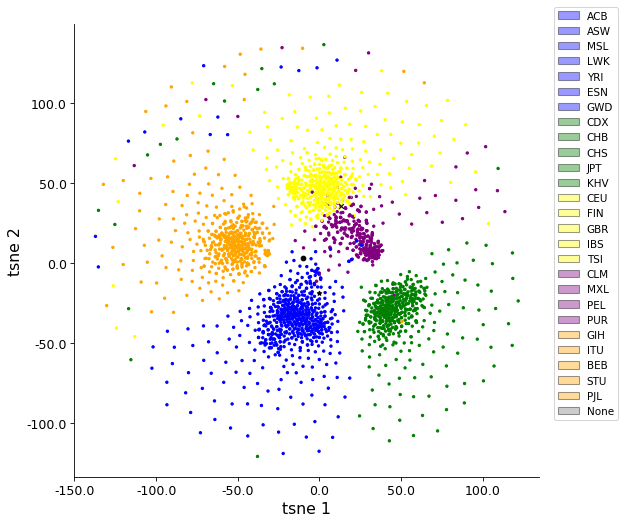

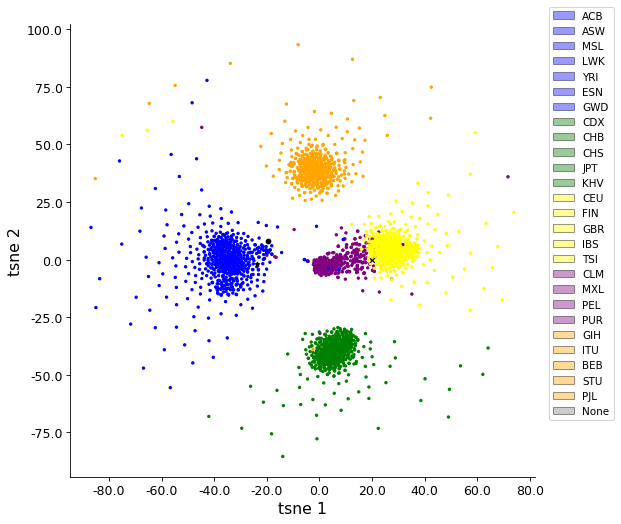

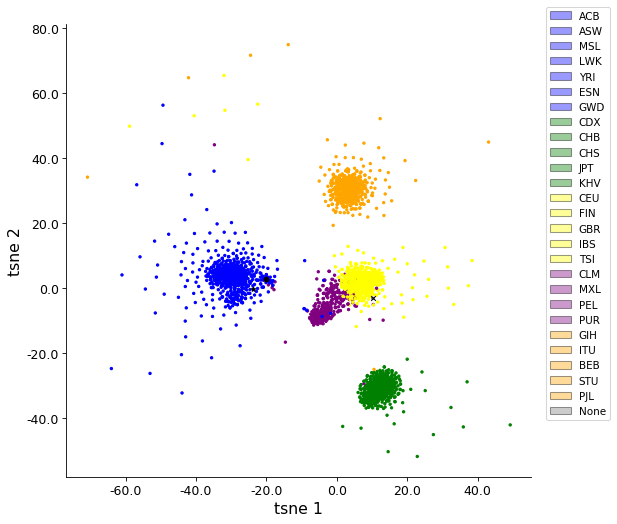

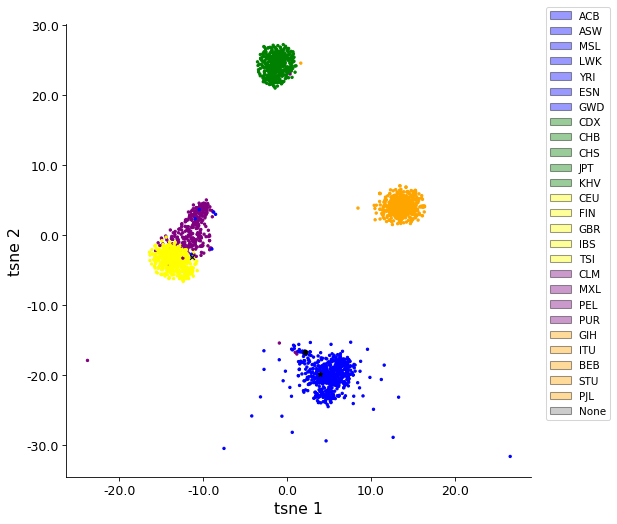

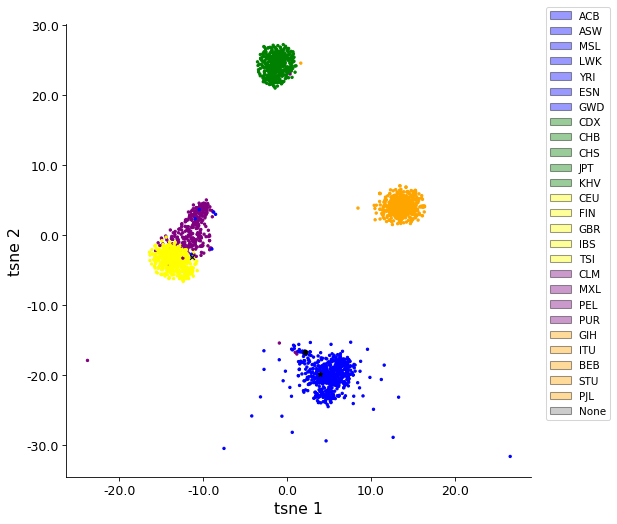

In [36]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_10,t2_10,d_tsne_10,'perplexity=10',fig,samples,pop_to_color,colors)
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_30,t2_30,d_tsne_30,'perplexity=30',fig,samples,pop_to_color,colors)
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_40,t2_40,d_tsne_40,'perplexity=40',fig,samples,pop_to_color,colors)
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_100,t2_100,d_tsne_100,'perplexity=1000',fig,samples,pop_to_color,colors)
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_100_iters,t2_100_iters,d_tsne_100_iters,'perplexity=100, n_iter=1000',fig,samples,pop_to_color,colors)


Adapted Code from TSNE-Multicore Github
reference: https://github.com/DmitryUlyanov/Multicore-TSNE

In [37]:
import numpy as np
import os
from MulticoreTSNE import MulticoreTSNE as TSNE2

Mtsne_50 = TSNE2(n_components=2,perplexity = 50)  #equals to n^1/2
data_tsne = Mtsne_50.fit(data_transpose)



## 1-3 UMAP

In [6]:
import umap
d_umap = umap.UMAP(n_components=2).fit_transform(data_transpose)


Populating the interactive namespace from numpy and matplotlib
tsne values for NA10847 = [-4.172805  8.421225]
tsne values for NA18923 = [-2.1899326 -5.4678802]
tsne values for NA19700 = [-2.4068923 -3.6557264]


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'indices', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


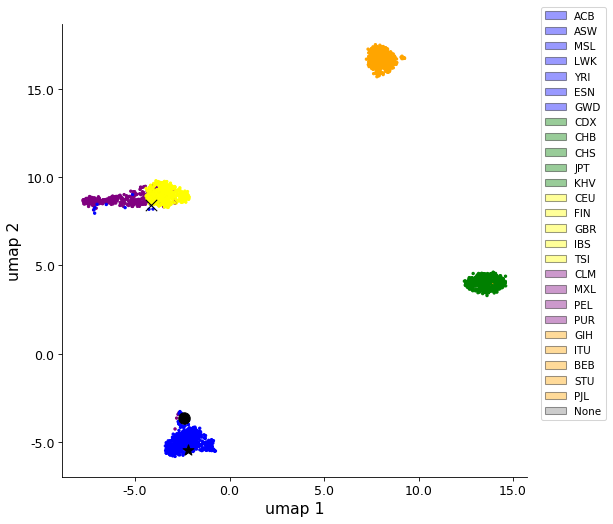

In [7]:
%pylab inline
import numpy as np
import os
import matplotlib.patches as mpatches
    
u1 = [0]*len(samples)
u2 = [0]*len(samples)
# Load PCs
# Below replace lists pc1 and pc2 vectors computed in step 2 above
# YOUR CODE HERE
u1=d_umap[:,0]
u2 = d_umap[:,1]
#raise NotImplementedError()

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(u1, u2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("umap 1", size=15)
ax.set_ylabel("umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
# YOUR CODE HERE
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('tsne values for %s = %s'%(x,d_umap[samples.index(x)]))
    
ax.scatter(d_umap[samples.index('NA10847'),0], d_umap[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA18923'),0], d_umap[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA19700'),0], d_umap[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)


In [8]:
fig.savefig("umap.pdf",bbox_inches='tight')

## 1-4 PHATE

In [42]:
import phate
import pickle

# Default parameters for the PHATE function are:
# k: number of nearest neighbors, default is 5
# a: alpha decay, default is 40
# t: number of times to power the operator, default "auto", 21 for these data
# gamma: informational distance constant, default is 1.

phate_op = phate.PHATE(n_jobs=-2) #t=100, gamma=0, 
snp_phate = phate_op.fit_transform(data_transpose)

with open('phate_ps2.pkl', 'wb') as handle:
    pickle.dump(snp_phate, handle, protocol=pickle.HIGHEST_PROTOCOL)



Calculating PHATE...
  Running PHATE on 2504 observations and 28622 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 156.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.66 seconds.
    Calculating affinities...
    Calculated affinities in 0.23 seconds.
  Calculated graph and diffusion operator in 157.08 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 42.39 seconds.
    Calculating KMeans...
    Calculated KMeans in 1187.29 seconds.
  Calculated landmark operator in 1230.68 seconds.
  Calculating optimal t...
    Automatically selected t = 7
  Calculated optimal t in 1050.80 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 29.28 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.88 seconds.
Calculated PHATE in 2480.74 seconds.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  after removing the cwd from sys.path.
/home/sataheri/.local/lib/python3.6/site-packages/scprep/plot/scatter.py:415: UserWarning: `c` is a color array and cannot be used to create a legend. To interpret these values as labels instead, provide a `cmap` dictionary with label-color pairs.
  UserWarning,


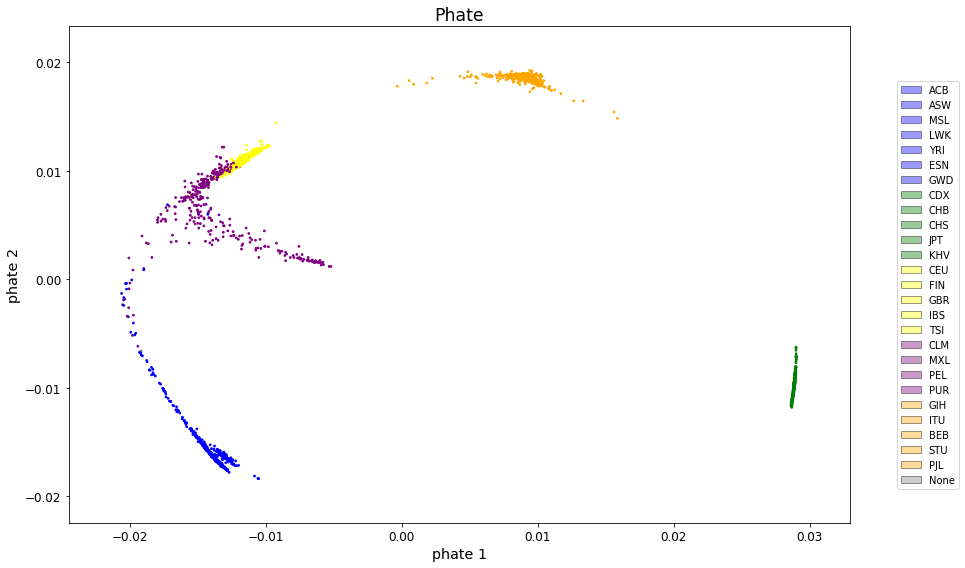

In [59]:
# Now plot using phate.plot.scatter2d


ax=phate.plot.scatter2d(snp_phate, c=colors ,s=3, figsize=(12,8), cmap="Spectral",dpi=75,legend=True,xlabel="phate 1",ylabel="phate 2",title="Phate",filename ='Phate-default.pdf')
np.savetxt("ps2_phate.projection.txt", snp_phate, fmt='%.5f')
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 0.9))
ax.get_xaxis().tick_bottom();

In [69]:
phate_op = phate.PHATE(n_jobs=-2,t=10)
phate_t10 = phate_op.fit_transform(data_transpose)
with open('phate_ps2_t10.pkl', 'wb') as handle:
    pickle.dump(phate_t10, handle, protocol=pickle.HIGHEST_PROTOCOL)


Calculating PHATE...
  Running PHATE on 2504 observations and 28622 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 145.37 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.66 seconds.
    Calculating affinities...
    Calculated affinities in 0.25 seconds.
  Calculated graph and diffusion operator in 146.29 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 43.53 seconds.
    Calculating KMeans...
    Calculated KMeans in 1050.83 seconds.
  Calculated landmark operator in 1095.54 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 32.79 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 11.83 seconds.
Calculated PHATE in 1286.47 seconds.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  """Entry point for launching an IPython kernel.
/home/sataheri/.local/lib/python3.6/site-packages/scprep/plot/scatter.py:415: UserWarning: `c` is a color array and cannot be used to create a legend. To interpret these values as labels instead, provide a `cmap` dictionary with label-color pairs.
  UserWarning,


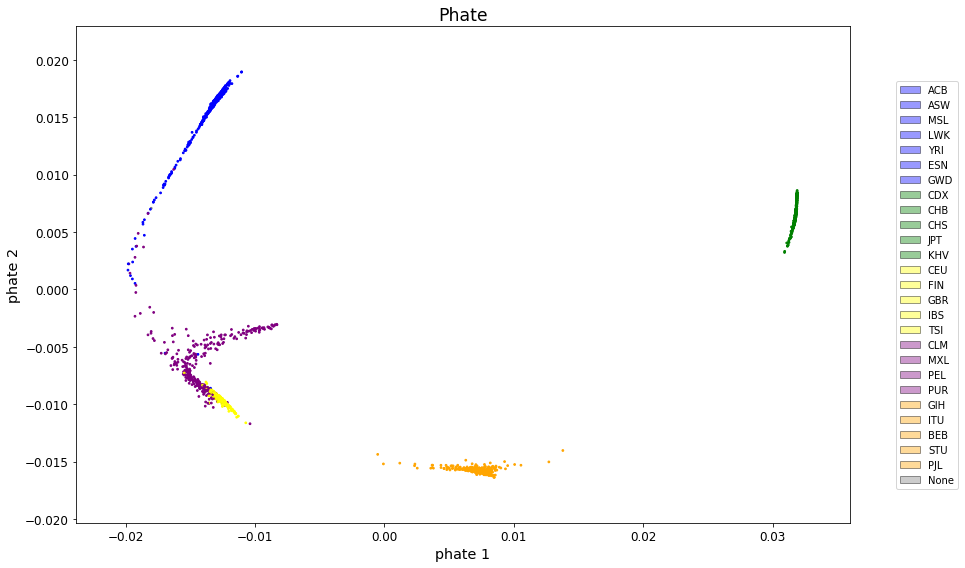

In [70]:
ax=phate.plot.scatter2d(phate_t10, c=colors ,s=3, figsize=(12,8), cmap="Spectral",dpi=75,legend=True,xlabel="phate 1",ylabel="phate 2",title="Phate",filename ='Phate-t10.pdf')
np.savetxt("ps2_phate_t10.projection.txt", phate_t15, fmt='%.5f')
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 0.9))
ax.get_xaxis().tick_bottom();

In [71]:
phate_op = phate.PHATE(n_jobs=-2,mds="nonmetric") #t=100, gamma=0, 
snp_phate = phate_op.fit_transform(data_transpose)

with open('phate_ps2_nonmetric.pkl', 'wb') as handle:
    pickle.dump(snp_phate, handle, protocol=pickle.HIGHEST_PROTOCOL)


# phate_operator = phate.PHATE(n_components=2, a=10, k=5, t=30, mds='classic',

# knn_dist='euclidean', mds_dist='euclidean', njobs=-2)


Calculating PHATE...
  Running PHATE on 2504 observations and 28622 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 143.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.70 seconds.
    Calculating affinities...
    Calculated affinities in 0.27 seconds.
  Calculated graph and diffusion operator in 144.05 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 42.27 seconds.
    Calculating KMeans...
    Calculated KMeans in 945.13 seconds.
  Calculated landmark operator in 988.50 seconds.
  Calculating optimal t...
    Automatically selected t = 7
  Calculated optimal t in 1031.09 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 23.07 seconds.
  Calculating nonmetric MDS...
  Calculated nonmetric MDS in 400.88 seconds.
Calculated PHATE in 2587.60 seconds.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  after removing the cwd from sys.path.
/home/sataheri/.local/lib/python3.6/site-packages/scprep/plot/scatter.py:415: UserWarning: `c` is a color array and cannot be used to create a legend. To interpret these values as labels instead, provide a `cmap` dictionary with label-color pairs.
  UserWarning,


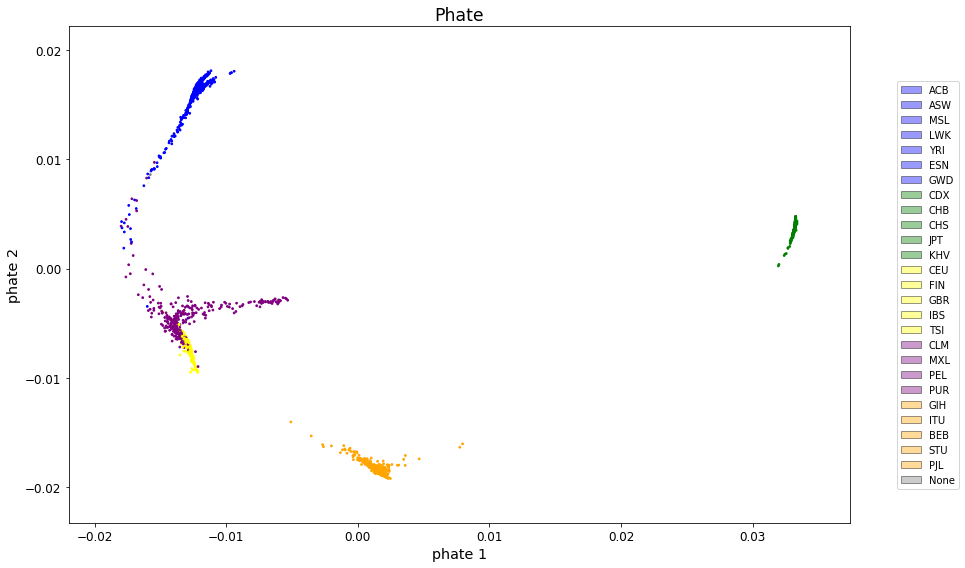

In [72]:
# Now plot using phate.plot.scatter2d


ax=phate.plot.scatter2d(snp_phate, c=colors ,s=3, figsize=(12,8), cmap="Spectral",dpi=75,legend=True,xlabel="phate 1",ylabel="phate 2",title="Phate",filename ='phate_ps2_nonmetric.pdf')
np.savetxt("ps2phate_ps2_nonmetric.txt", snp_phate, fmt='%.5f')
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 0.9))
ax.get_xaxis().tick_bottom();

In [73]:
phate_op = phate.PHATE(n_jobs=-2,mds="classic") #t=100, gamma=0, 
snp_phate = phate_op.fit_transform(data_transpose)

with open('phate_ps2_classic.pkl', 'wb') as handle:
    pickle.dump(snp_phate, handle, protocol=pickle.HIGHEST_PROTOCOL)

Calculating PHATE...
  Running PHATE on 2504 observations and 28622 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 123.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.60 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 124.50 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 36.33 seconds.
    Calculating KMeans...
    Calculated KMeans in 864.93 seconds.
  Calculated landmark operator in 902.23 seconds.
  Calculating optimal t...
    Automatically selected t = 6
  Calculated optimal t in 996.51 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 17.19 seconds.
  Calculating classic MDS...
  Calculated classic MDS in 8.92 seconds.
Calculated PHATE in 2049.36 seconds.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  """Entry point for launching an IPython kernel.
/home/sataheri/.local/lib/python3.6/site-packages/scprep/plot/scatter.py:415: UserWarning: `c` is a color array and cannot be used to create a legend. To interpret these values as labels instead, provide a `cmap` dictionary with label-color pairs.
  UserWarning,


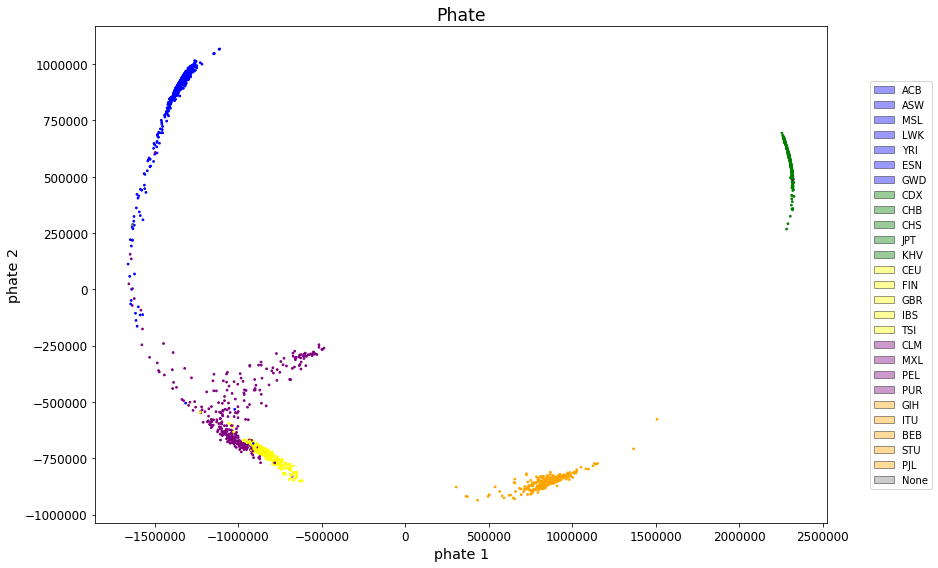

In [74]:
ax=phate.plot.scatter2d(snp_phate, c=colors ,s=3, figsize=(12,8), cmap="Spectral",dpi=75,legend=True,xlabel="phate 1",ylabel="phate 2",title="Phate",filename ='phate_ps2_classic.pdf')
np.savetxt("ps2phate_ps2_classic.txt", snp_phate, fmt='%.5f')
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 0.9))
ax.get_xaxis().tick_bottom();

## 1-5 M-PHATE

we can not use this method for our dataset. It needs a time evolution dataset

In [6]:
import m_phate
import scprep

# apply M-PHATE
m_phate_op = m_phate.M_PHATE( n_jobs = -2)
m_phate_data = m_phate_op.fit_transform(data_transpose)

Calculating M-PHATE...


ValueError: Expected X to be a tensor with three dimensions. Got shape (2504, 28622)

In [ ]:
# 3D scatterplot. 
phate.plot.scatter3d(phate_operator, c=sample_labels, s=3, figsize=(8,6), cmap="Spectral")

# 2 whole 1KGP dataset

By the following codes in the next cell, we got genotype matrix with 500K SNPs for all 22 chromosomes:

Filtered the data to SNPs with MAF >=1%, and SNPs with more than 2 alleles



In [1]:
%%bash

DATADIR=/datasets/cs284s-sp20-public/1000Genomes
for chrom in $(seq 1 22)
do
    bcftools query -e'AF<0.01' -e'AF>0.99' -f "[%GT\t]\n" ${DATADIR}/ALL.chr${chrom}.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz |\
      shuf -n 22800 |\
      sed 's/0|0/0/g' | sed 's/0|1/1/g' | sed 's/1|0/1/g' | sed 's/1|1/2/g' | \
      grep -v "|" \
      > ~/CSE284_final_project/nohup_output/chr${chrom}_shuf.genotypes.tab
done

# we used the following piece of code to merge them:


# ------------------------------------------------------------------------------------

DIR=~/CSE284_final_project/nohup_output


for chrom in $(seq 1 22)
do
    cat ${DIR}/chr${chrom}_shuf.genotypes.tab >> ${DIR}/merged.tab
done




In [1]:
import numpy as np

data = np.loadtxt('merged.tab') #snps*samples
data_transpose = data.transpose()

In [6]:
%pylab inline
import numpy as np
import os
import matplotlib.patches as mpatches
    
####### Set up sample lists and color information #####
# Load population labels
sample_to_pop = {}
with open("/datasets/cs284s-sp20-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

#Recommended colors for each population group
pop_to_color = {"ACB": "blue", "ASW": "blue", "BEB": "blue", 
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green",
                 "CEU": "yellow", "ESN": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "ITU": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PJL": "purple", "PUR": "purple", "STU": "purple",
                "GIH": "orange", "GWD": "orange",
                "KHV": "red", "LWK": "red","MSL": "red", "YRI": "red",
                "None": "gray"    
               }


pop_to_color = {"ACB": "blue","ASW": "blue", "MSL":"blue","LWK": "blue", "YRI": "blue", "ESN": "blue", "GWD": "blue",
"CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green","KHV": "green",
"CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
"CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
"GIH": "orange","ITU": "orange", "BEB": "orange", "STU": "orange", "PJL": "orange",
"None": "gray"
}  #
# Load samples list and get colors
# Assumes you generated file ps2_pca.samples.txt in Step 1
# If not, will give an empty list for samples
if not os.path.exists(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt")):
    samples = []
else: samples = [item.strip() for item in open(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 2-1 PCA

In [ ]:

pca = PCA(n_components=2)
pca.fit(data_transpose)
d_pca = pca.transform(data_transpose)
np.savetxt('./merged.projection-tab.txt', d_pca,delimiter='\t')
np.savetxt('./merged.projection.txt', d_pca)


In [11]:
pc1 = [0]*len(samples)
pc2 = [0]*len(samples)

pc1=d_pca[:,0]
pc2 = d_pca[:,1]

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('PC values for %s = %s'%(x,d_pca[samples.index(x)]))
    
ax.scatter(d_pca[samples.index('NA10847'),0], d_pca[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA18923'),0], d_pca[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA19700'),0], d_pca[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)
fig.savefig("merged.pdf",bbox_inches='tight')


## 2-2 T-sne

In [ ]:
from sklearn.manifold import MDS, TSNE
import numpy as np
import os

#-------------------------
tsne_50 = TSNE(n_components=2,perplexity = 50,random_state=0)  #equals to n^1/2
tsne_50_iter5000 = TSNE(n_components=2,perplexity = 50,random_state=0,n_iter=5000)  #equals to n^1/2

tsne_60 = TSNE(n_components=2,perplexity = 60,random_state=0,n_iter=5000)
tsne_60_iter5000 = TSNE(n_components=2,perplexity = 60,random_state=0)
tsne_100 = TSNE(n_components=2,perplexity = 100,random_state=0)
tsne_100_1000 = TSNE(n_components=2,perplexity = 100,random_state=0,n_iter=1000)

# fit -------------------------------------------


data_tsne_50 = tsne_50.fit(data_transpose)
np.save('merged_data_tsne_50.npy', data_tsne_50)

data_tsne_50_iter5000 = tsne_50_iter5000.fit(data_transpose)
np.save('merged_data_tsne_50_iter5000.npy', data_tsne_50_iter5000)


data_tsne_60 = tsne_60.fit(data_transpose)
np.save('merged_data_tsne_60.npy', data_tsne_60)

data_tsne_60_iter5000 = tsne_60.fit(data_transpose)
np.save('merged_data_tsne_60_iter5000.npy', data_tsne_60_iter5000)

data_tsne_100 = tsne_100.fit(data_transpose)
np.save('merged_data_tsne_100.npy', data_tsne_100)

data_tsne_100_1000 = tsne_100_1000.fit(data_transpose)
np.save('merged_data_tsne_100_1000.npy', data_tsne_100_1000)


In [3]:
from sklearn.manifold import MDS, TSNE
import numpy as np
import os
data_tsne_50 = np.load('merged_data_tsne_50.npy',allow_pickle=True)
data_tsne_50_iter5000 = np.load('merged_data_tsne_50_iter5000.npy',allow_pickle=True)
data_tsne_60 = np.load('merged_data_tsne_60.npy',allow_pickle=True)
data_tsne_60_iter5000 = np.load('merged_data_tsne_60_iter5000.npy',allow_pickle=True)
data_tsne_100 = np.load('merged_data_tsne_100.npy',allow_pickle=True)
data_tsne_100_1000 = np.load('merged_data_tsne_100_1000.npy',allow_pickle=True)

In [5]:
####### Load data you should've generated in steps 1 and 2 #####
t1_50 = [0]*len(samples)
t1_50 = [0]*len(samples)
d_tsne_50=data_tsne_50.item().embedding_#.embedding_
t1_50=d_tsne_50[:,0]
t2_50 = d_tsne_50[:,1]
#---------
t1_50_iters = [0]*len(samples)
t2_50_iters = [0]*len(samples)
d_tsne_50_iters=data_tsne_50_iter5000.item().embedding_
t1_50_iters=d_tsne_50_iters[:,0]
t2_50_iters = d_tsne_50_iters[:,1]
#--------
t1_60 = [0]*len(samples)
t1_60 = [0]*len(samples)
d_tsne_60=data_tsne_60.item().embedding_

t1_60=d_tsne_60[:,0]
t2_60 = d_tsne_60[:,1]
#---------
t1_60_iters = [0]*len(samples)
t2_60_iters = [0]*len(samples)
d_tsne_60_iters=data_tsne_60_iter5000.item().embedding_

t1_60_iters=d_tsne_60_iters[:,0]
t2_60_iters = d_tsne_60_iters[:,1]

#--------
t1_100 = [0]*len(samples)
t1_100 = [0]*len(samples)
d_tsne_100=data_tsne_100.item().embedding_

t1_100=d_tsne_100[:,0]
t2_100 = d_tsne_100[:,1]
#---------
t1_100_iters = [0]*len(samples)
t2_100_iters = [0]*len(samples)
d_tsne_100_iters=data_tsne_100_1000.item().embedding_

t1_100_iters=d_tsne_100_iters[:,0]
t2_100_iters = d_tsne_100_iters[:,1]



In [6]:
def plot_maker(ax,t1,t2,d_tsne,title,fig,samples,pop_to_color,colors):
    ax.scatter(t1, t2, color=colors, s=5)
    # Now make it look a little prettier since I can't stand matplotlib defaults...
    ax.set_xlabel("tsne 1", size=15)
    ax.set_ylabel("tsne 2", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    ax.spines["top"].set_visible(False);
    ax.spines["right"].set_visible(False);
    leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

    ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
    ax.get_xaxis().tick_bottom();
    ax.get_yaxis().tick_left();

    interesting_s = ['NA10847','NA18923','NA19700']
    indices=[samples.index(x) for x in interesting_s]
    for x in interesting_s: print('tsne values for %s = %s'%(x,d_tsne[samples.index(x)]))

    ax.scatter(d_tsne[samples.index('NA10847'),0], d_tsne[samples.index('NA10847'),1],s=20,marker="x",c="black",linewidth=1)
    ax.scatter(d_tsne[samples.index('NA18923'),0], d_tsne[samples.index('NA18923'),1],s=20,marker="*",c="black",linewidth=1)
    ax.scatter(d_tsne[samples.index('NA19700'),0], d_tsne[samples.index('NA19700'),1],s=20,marker="o",c="black",linewidth=1)
    fig.savefig('merged_T-SNE_'+title+'.pdf',bbox_inches='tight')
#     plt.close(fig) 



tsne values for NA10847 = [-28.781906    1.8397856]
tsne values for NA18923 = [24.266066 -7.789515]
tsne values for NA19700 = [19.620346  -3.0263026]


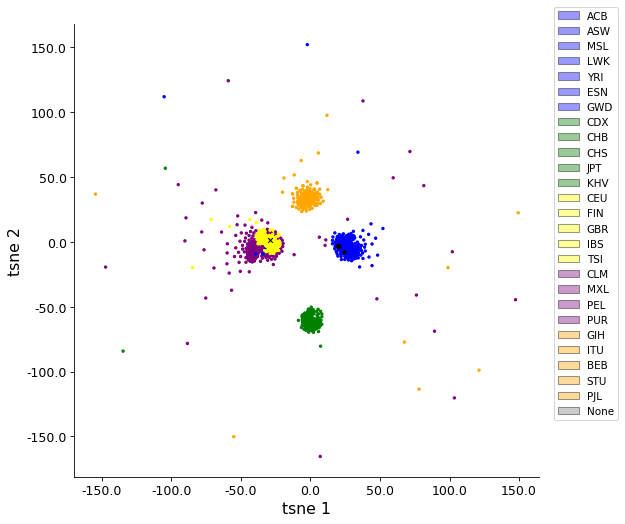

In [7]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_60_iters,t2_60_iters,d_tsne_60_iters,'perplexity=60,1000',fig,samples,pop_to_color,colors)

tsne values for NA10847 = [-29.226507    0.9778213]
tsne values for NA18923 = [39.158207   5.7013383]
tsne values for NA19700 = [31.30599  7.64174]


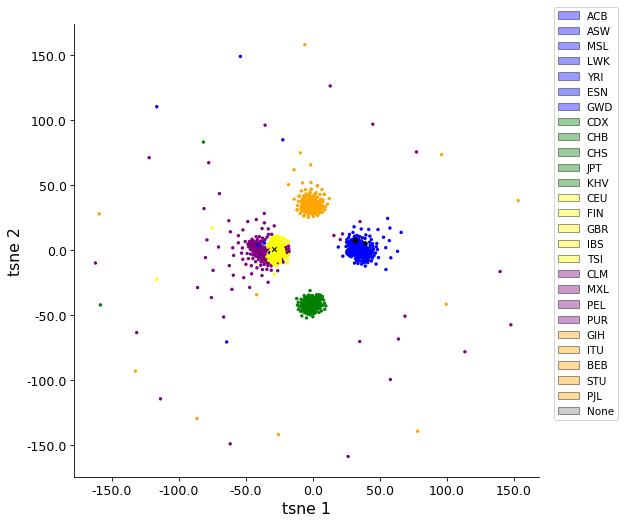

In [8]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_50_iters,t2_50_iters,d_tsne_50_iters,'perplexity=50, n_iter=5000',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [-28.781906    1.8397856]
tsne values for NA18923 = [24.266066 -7.789515]
tsne values for NA19700 = [19.620346  -3.0263026]


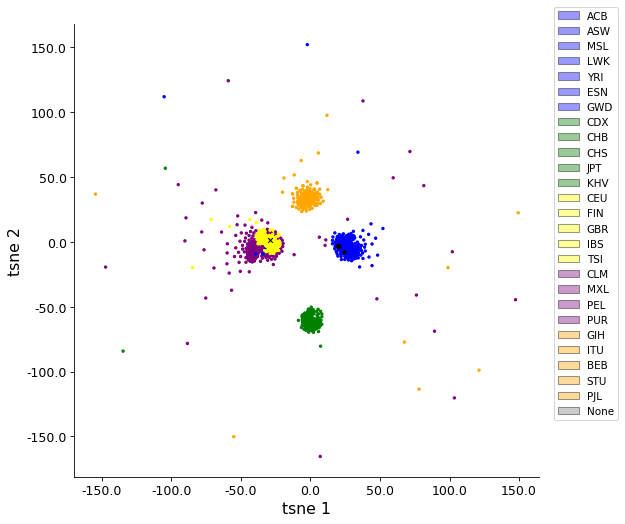

In [9]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_60,t2_60,d_tsne_60,'perplexity=60',fig,samples,pop_to_color,colors)


tsne values for NA10847 = [-17.114628    -0.49490896]
tsne values for NA18923 = [21.283714   5.3876386]
tsne values for NA19700 = [17.645493   2.5210798]
tsne values for NA10847 = [-17.114628    -0.49490896]
tsne values for NA18923 = [21.283714   5.3876386]
tsne values for NA19700 = [17.645493   2.5210798]


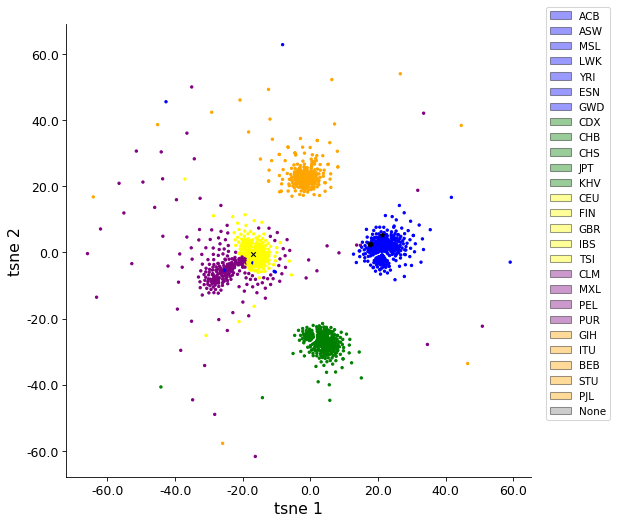

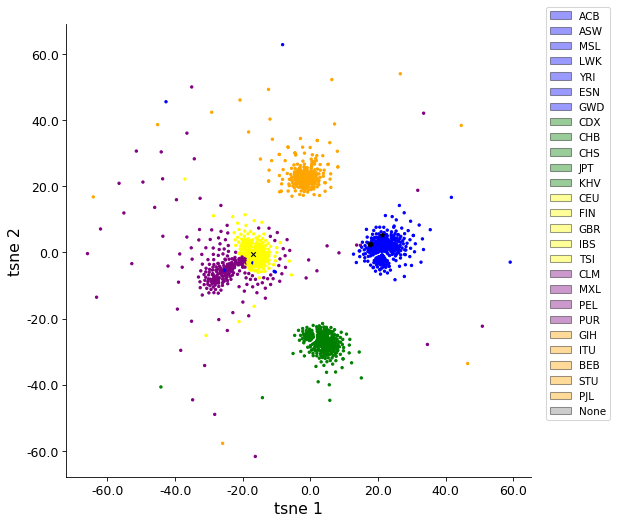

In [10]:
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_100,t2_100,d_tsne_100,'perplexity=1000',fig,samples,pop_to_color,colors)
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
plot_maker(ax,t1_100_iters,t2_100_iters,d_tsne_100_iters,'perplexity=100, n_iter=1000',fig,samples,pop_to_color,colors)

In [14]:
import umap

d_umap = umap.UMAP(n_components=2,random_state=42,min_dist=0.5).fit_transform(data_transpose)
np.save('merged_umap_0.5.npy', d_umap)


tsne values for NA10847 = [11.942257 11.021921]
tsne values for NA18923 = [15.417341   3.5633645]
tsne values for NA19700 = [15.233793   5.9575667]


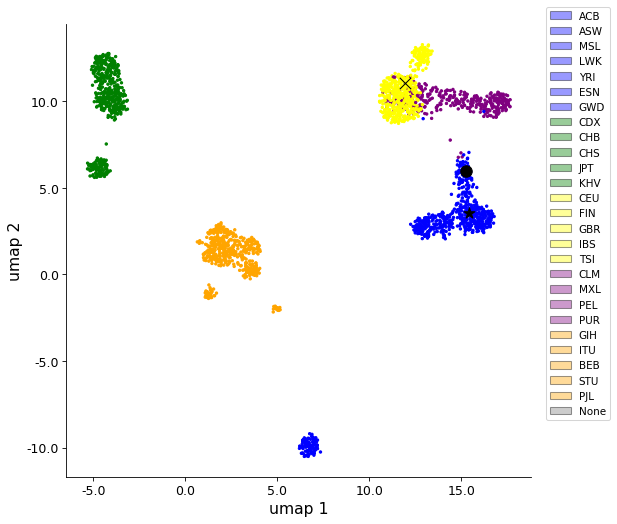

In [15]:
u1 = [0]*len(samples)
u2 = [0]*len(samples)

u1=d_umap[:,0]
u2 = d_umap[:,1]

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(u1, u2, color=colors, s=5)
ax.set_xlabel("umap 1", size=15)
ax.set_ylabel("umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
# YOUR CODE HERE
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('tsne values for %s = %s'%(x,d_umap[samples.index(x)]))
    
ax.scatter(d_umap[samples.index('NA10847'),0], d_umap[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA18923'),0], d_umap[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA19700'),0], d_umap[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)


In [16]:
fig.savefig("merged_umap_0.5.pdf",bbox_inches='tight')

In [4]:
import umap
 
umap.UMAP(n_components=2,random_state=42)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [5]:
import umap

d_umap = umap.UMAP(n_components=2,random_state=42,min_dist=0.2, metric="dice").fit_transform(data_transpose)
np.save('merged_umap_0.2_dice.npy', d_umap)


/home/sataheri/.local/lib/python3.6/site-packages/umap/umap_.py:1529: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


tsne values for NA10847 = [13.518918  9.768325]
tsne values for NA18923 = [12.765229 -6.179291]
tsne values for NA19700 = [12.525803  -5.8232045]


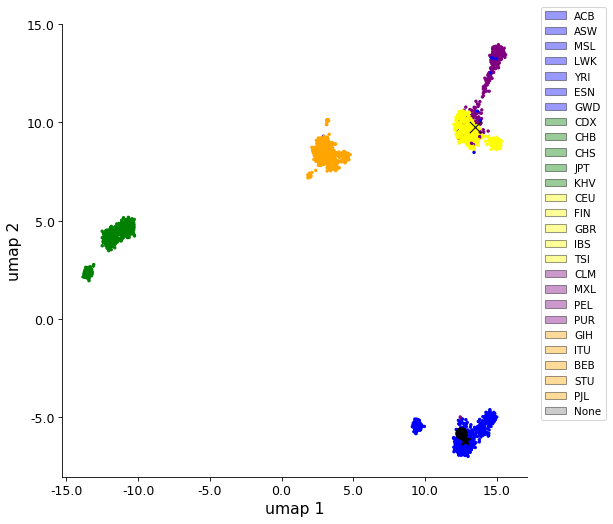

In [7]:
u1 = [0]*len(samples)
u2 = [0]*len(samples)

u1=d_umap[:,0]
u2 = d_umap[:,1]

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(u1, u2, color=colors, s=5)
ax.set_xlabel("umap 1", size=15)
ax.set_ylabel("umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
# YOUR CODE HERE
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('tsne values for %s = %s'%(x,d_umap[samples.index(x)]))
    
ax.scatter(d_umap[samples.index('NA10847'),0], d_umap[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA18923'),0], d_umap[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_umap[samples.index('NA19700'),0], d_umap[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)
fig.savefig("merged_umap_0.2_dice.pdf",bbox_inches='tight')

## 2-4 PHATE


In [8]:
import phate
import pickle
phate_op = phate.PHATE(n_jobs=-2,mds="classic") #t=100, gamma=0, 
snp_phate = phate_op.fit_transform(data_transpose)

with open('phate_merged_classic.pkl', 'wb') as handle:
    pickle.dump(snp_phate, handle, protocol=pickle.HIGHEST_PROTOCOL)

Calculating PHATE...
  Running PHATE on 2504 observations and 498971 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4562.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 4563.32 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 44.32 seconds.
    Calculating KMeans...
    Calculated KMeans in 970.20 seconds.
  Calculated landmark operator in 1015.98 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 1367.63 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 131.95 seconds.
  Calculating classic MDS...
  Calculated classic MDS in 11.05 seconds.
Calculated PHATE in 7089.95 seconds.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  """Entry point for launching an IPython kernel.
/home/sataheri/.local/lib/python3.6/site-packages/scprep/plot/scatter.py:415: UserWarning: `c` is a color array and cannot be used to create a legend. To interpret these values as labels instead, provide a `cmap` dictionary with label-color pairs.
  UserWarning,


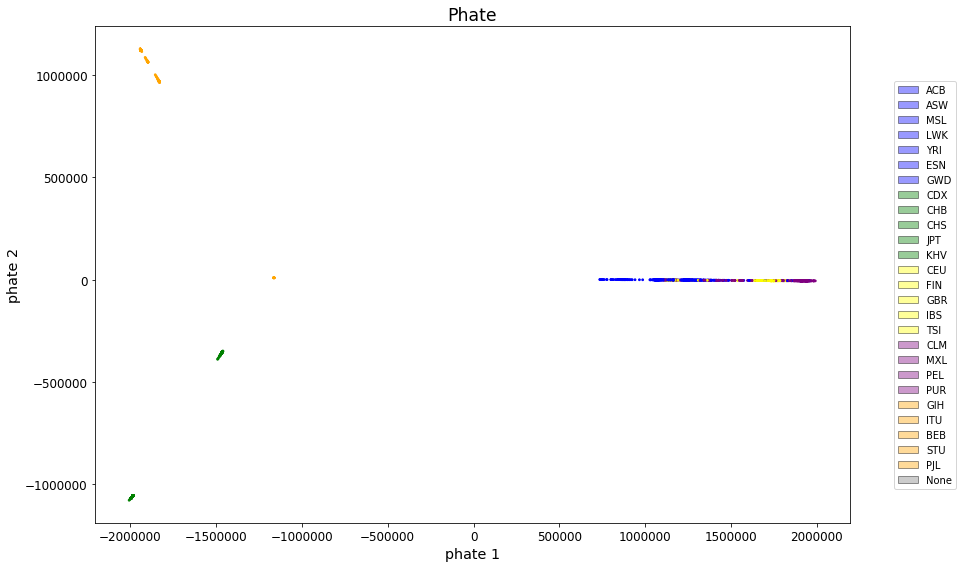

In [9]:
ax=phate.plot.scatter2d(snp_phate, c=colors ,s=3, figsize=(12,8), cmap="Spectral",dpi=75,legend=True,xlabel="phate 1",ylabel="phate 2",title="Phate",filename ='phate_merged_classic.pdf')
np.savetxt("phate_merged_classic.txt", snp_phate, fmt='%.5f')
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 0.9))
ax.get_xaxis().tick_bottom();

Populating the interactive namespace from numpy and matplotlib
PC values for NA10847 = [-12.74463849 -35.87971817]
PC values for NA18923 = [70.6085013   4.14926106]
PC values for NA19700 = [42.25292748 -3.51997008]


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


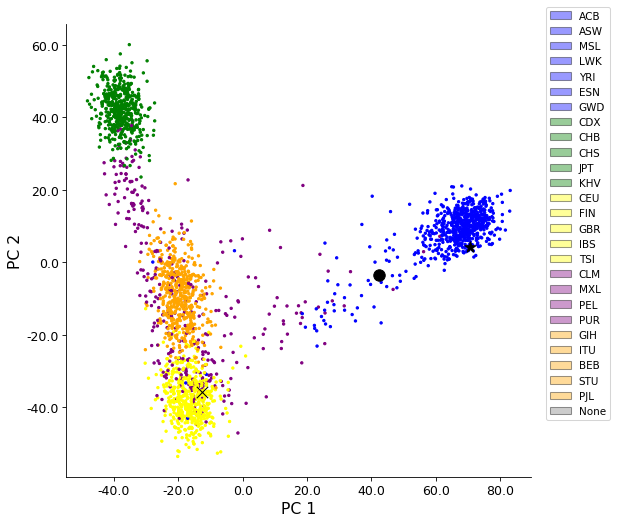

In [12]:
%pylab inline
import numpy as np
import os
import matplotlib.patches as mpatches
    
####### Set up sample lists and color information #####
# Load population labels
sample_to_pop = {}
with open("/datasets/cs284s-sp20-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

#Recommended colors for each population group
# pop_to_color = {"ACB": "blue", "ASW": "blue", "BEB": "blue", 
#                 "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green",
#                  "CEU": "yellow", "ESN": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "ITU": "yellow", "TSI": "yellow",
#                 "CLM": "purple", "MXL": "purple", "PEL": "purple", "PJL": "purple", "PUR": "purple", "STU": "purple",
#                 "GIH": "orange", "GWD": "orange",
#                 "KHV": "red", "LWK": "red","MSL": "red", "YRI": "red",
#                 "None": "gray"    
#                }



# {"YRI": "blue", "LWK": "blue", "GWD": "blue",
#                 "MSL": "blue", "ESN": "blue", "ACB": "blue", "ASW": "blue",
#                 "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green", "KHV": "green",
#                 "CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
#                 "CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
#                 "GIH": "orange", "BEB": "orange", "ITU": "orange", "PJL": "orange", "STU": "orange",
#                 "None": "gray"
#                }



pop_to_color = {"ACB": "blue","ASW": "blue", "MSL":"blue","LWK": "blue", "YRI": "blue", "ESN": "blue", "GWD": "blue",
"CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green","KHV": "green",
"CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
"CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
"GIH": "orange","ITU": "orange", "BEB": "orange", "STU": "orange", "PJL": "orange",
"None": "gray"
}  #
# Load samples list and get colors
# Assumes you generated file ps2_pca.samples.txt in Step 1
# If not, will give an empty list for samples
if not os.path.exists(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt")):
    samples = []
else: samples = [item.strip() for item in open(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
####### Load data #####
pc1 = [0]*len(samples)
pc2 = [0]*len(samples)

pc1=d_pca[:,0]
pc2 = d_pca[:,1]

# Make the plot
fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# You may find it helpful to print out or annotate on the plot
# the PC values for the unknown samples NA10847, NA18923, and NA19700
interesting_s = ['NA10847','NA18923','NA19700']
indices=[samples.index(x) for x in interesting_s]
for x in interesting_s: print('PC values for %s = %s'%(x,d_pca[samples.index(x)]))
    
ax.scatter(d_pca[samples.index('NA10847'),0], d_pca[samples.index('NA10847'),1],s=120,marker="x",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA18923'),0], d_pca[samples.index('NA18923'),1],s=120,marker="*",c="black",linewidth=1)
ax.scatter(d_pca[samples.index('NA19700'),0], d_pca[samples.index('NA19700'),1],s=120,marker="o",c="black",linewidth=1)
fig.savefig("chr22_first500k_pca.pdf",bbox_inches='tight')


# clustering 